In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#df = pd.read_csv('data/car_data.csv')
df = pd.read_csv('C:/Users/Steve/DEEPTECH MAY/eye_cancer_patients.csv')
#C:\Users\Steve\DEEPTECH MAY Training.csv Testing.csv
df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,None,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,None,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,None,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:


# Set up Seaborn theme
sns.set(style="whitegrid")


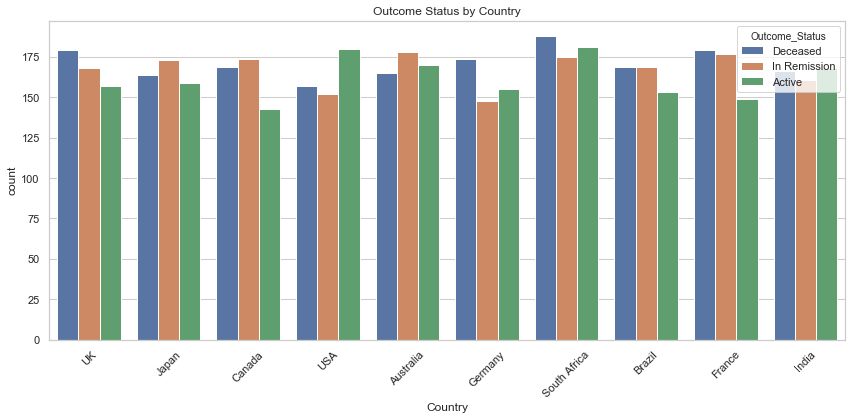

In [27]:
# Count Plot: Outcome Status by Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Outcome_Status')
plt.title("Outcome Status by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


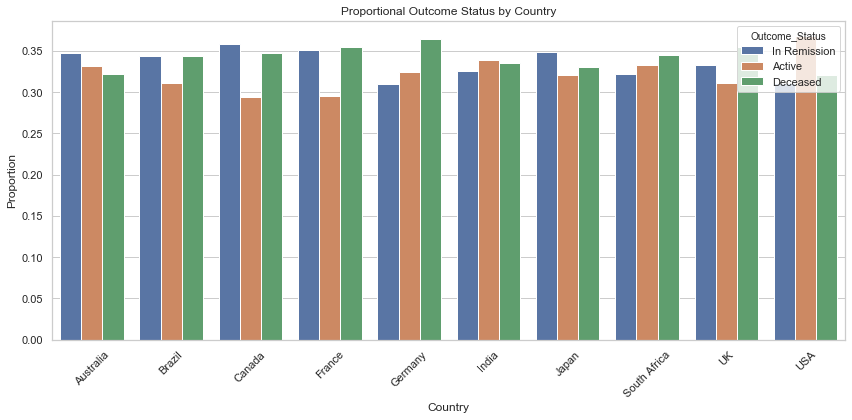

In [29]:
# Normalized Bar Plot: Proportion per country
prop_df = df.groupby('Country')['Outcome_Status'].value_counts(normalize=True).rename("Proportion").reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_df, x='Country', y='Proportion', hue='Outcome_Status')
plt.title("Proportional Outcome Status by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


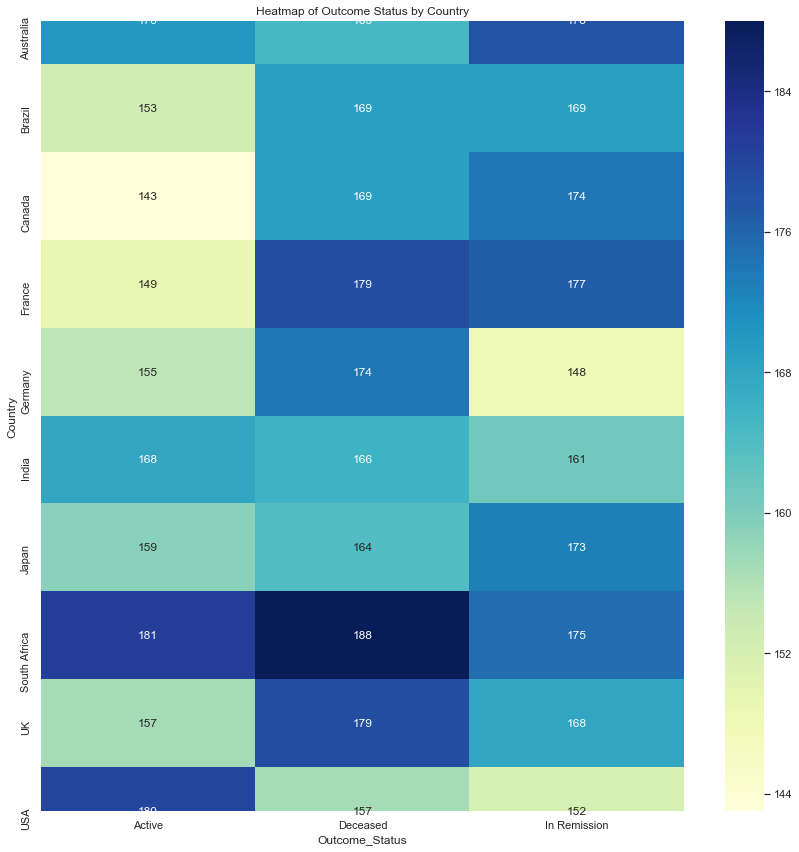

In [38]:
# Heatmap: Country vs Outcome Status frequency
crosstab = pd.crosstab(df['Country'], df['Outcome_Status'])
plt.figure(figsize=(12, 12))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Outcome Status by Country")
plt.tight_layout()
plt.show()


In [33]:
df.groupby('Country')['Outcome_Status'].value_counts()

Country       Outcome_Status
Australia     In Remission      178
              Active            170
              Deceased          165
Brazil        Deceased          169
              In Remission      169
              Active            153
Canada        In Remission      174
              Deceased          169
              Active            143
France        Deceased          179
              In Remission      177
              Active            149
Germany       Deceased          174
              Active            155
              In Remission      148
India         Active            168
              Deceased          166
              In Remission      161
Japan         In Remission      173
              Deceased          164
              Active            159
South Africa  Deceased          188
              Active            181
              In Remission      175
UK            Deceased          179
              In Remission      168
              Active            157

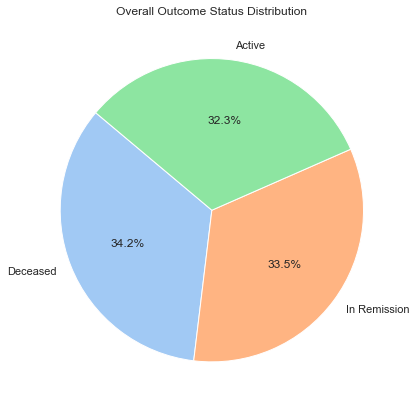

In [17]:
# Pie Chart: Overall Outcome Status Distribution
outcome_counts = df['Outcome_Status'].value_counts()
plt.figure(figsize=(6, 6))
outcome_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Overall Outcome Status Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [18]:
sns.set(style="whitegrid")

def plot_count_and_proportion(x, hue, title_prefix):
    # Count Plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=x, hue=hue)
    plt.title(f"{title_prefix} - Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Proportional Bar Plot
    prop_df = df.groupby(x)[hue].value_counts(normalize=True).rename("Proportion").reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=prop_df, x=x, y="Proportion", hue=hue)
    plt.title(f"{title_prefix} - Proportions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_heatmap(row, col, title):
    ctab = pd.crosstab(df[row], df[col])
    plt.figure(figsize=(10, 6))
    sns.heatmap(ctab, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_pie(column, title):
    plt.figure(figsize=(6, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(title)
    plt.ylabel("")
    plt.tight_layout()
    plt.show()





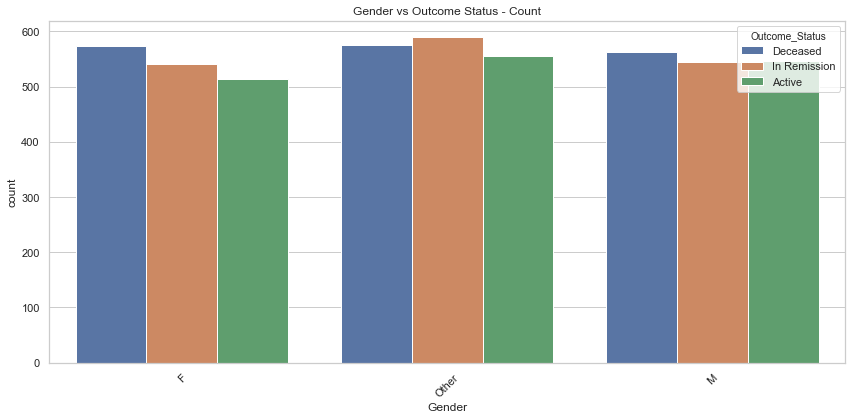

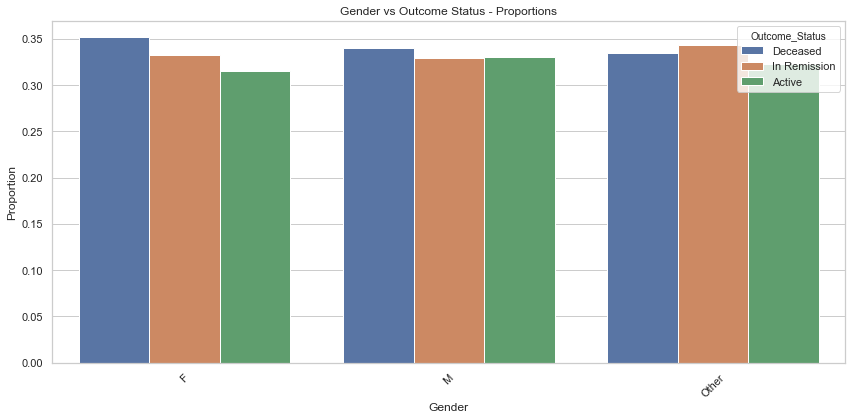

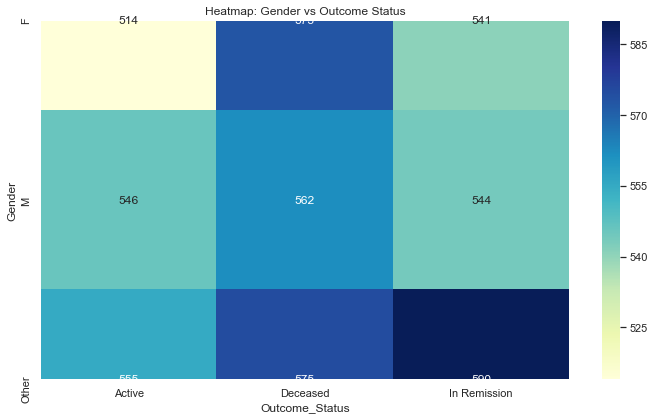

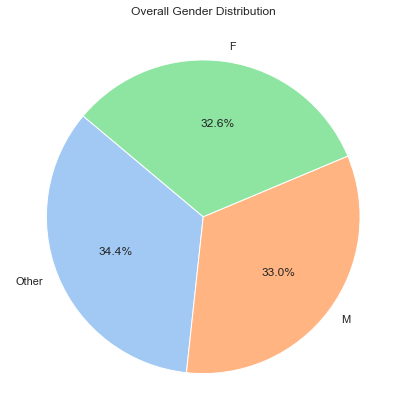

In [20]:
# =======================
# 1. Gender vs Outcome_Status
# =======================
plot_count_and_proportion("Gender", "Outcome_Status", "Gender vs Outcome Status")
plot_heatmap("Gender", "Outcome_Status", "Heatmap: Gender vs Outcome Status")
plot_pie("Gender", "Overall Gender Distribution")

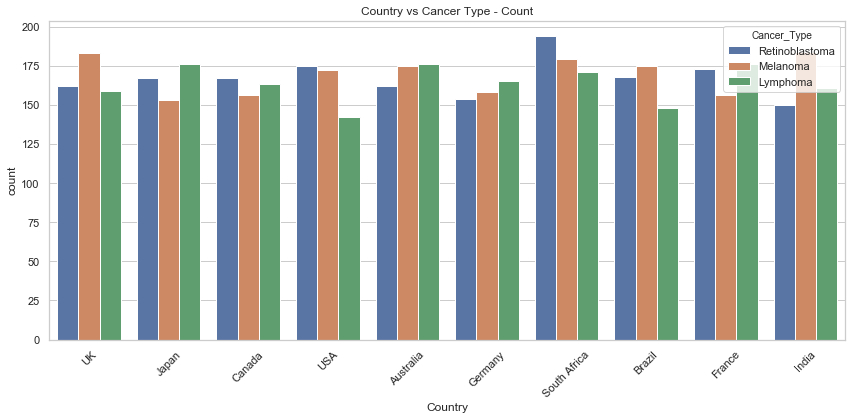

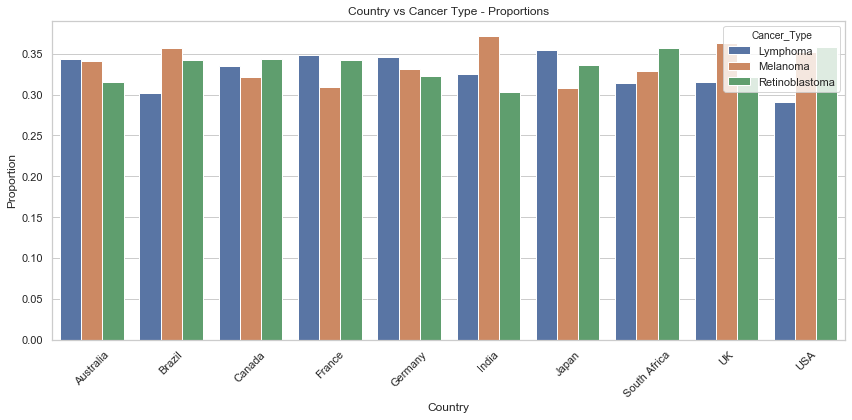

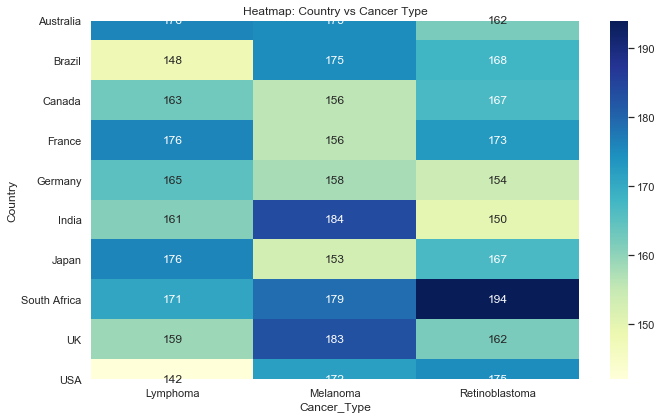

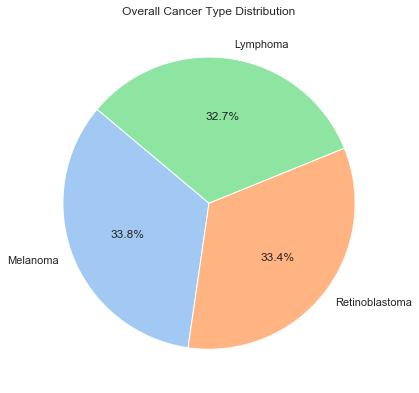

In [21]:
# =======================
# 2. Cancer_Type vs Country
# =======================
plot_count_and_proportion("Country", "Cancer_Type", "Country vs Cancer Type")
plot_heatmap("Country", "Cancer_Type", "Heatmap: Country vs Cancer Type")
plot_pie("Cancer_Type", "Overall Cancer Type Distribution")
